In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

import keras.utils as image
from ml_workflow.preprocess_from_folders import create_labels, extract_images
from ml_workflow.train_aritifical_neural_network import train
from sklearn.model_selection import train_test_split

Epoch 1/200
110/110 [==============================] - 1s 7ms/step - loss: 1.7204 - accuracy: 0.2975 - val_loss: 1.4446 - val_accuracy: 0.4036
Epoch 2/200
110/110 [==============================] - 1s 6ms/step - loss: 1.5094 - accuracy: 0.3481 - val_loss: 1.3282 - val_accuracy: 0.4396
Epoch 3/200
110/110 [==============================] - 1s 6ms/step - loss: 1.4084 - accuracy: 0.3942 - val_loss: 1.3043 - val_accuracy: 0.4062
Epoch 4/200
110/110 [==============================] - 1s 6ms/step - loss: 1.3670 - accuracy: 0.4179 - val_loss: 1.2867 - val_accuracy: 0.4113
Epoch 5/200
110/110 [==============================] - 1s 5ms/step - loss: 1.3437 - accuracy: 0.4314 - val_loss: 1.2465 - val_accuracy: 0.4473
Epoch 6/200
110/110 [==============================] - 1s 5ms/step - loss: 1.3089 - accuracy: 0.4342 - val_loss: 1.3088 - val_accuracy: 0.4216
Epoch 7/200
110/110 [==============================] - 1s 5ms/step - loss: 1.2813 - accuracy: 0.4551 - val_loss: 1.4303 - val_accuracy: 0.3625

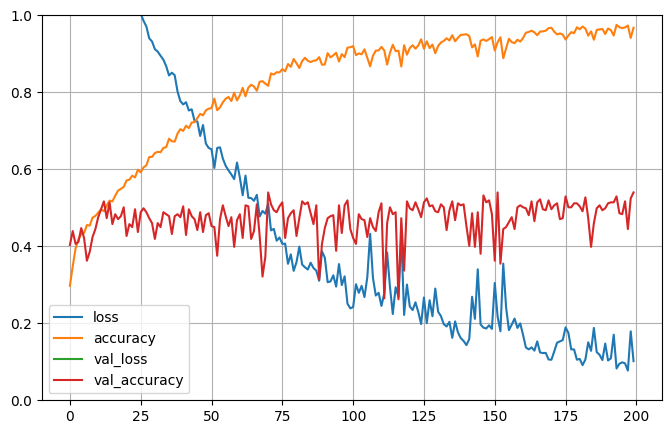

In [26]:
train()

In [3]:
labels = create_labels()

In [4]:
images = extract_images()

In [5]:
images.shape

(4317, 60, 60, 3)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, stratify=labels, test_size=0.10)

In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, stratify=y_train, test_size=0.10)

In [17]:
X_train = X_train / 255
X_valid = X_valid / 255
X_test = X_test / 255

In [18]:
keras.backend.clear_session()

In [20]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[60, 60, 3]),
    keras.layers.Dense(200, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation="softmax")
])

In [21]:
sgd = keras.optimizers.SGD(learning_rate=0.01)

In [22]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

In [23]:
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_valid, y_valid))

Epoch 1/200
110/110 [==============================] - 1s 6ms/step - loss: 1.7586 - accuracy: 0.2912 - val_loss: 1.6818 - val_accuracy: 0.2905
Epoch 2/200
110/110 [==============================] - 1s 6ms/step - loss: 1.5249 - accuracy: 0.3581 - val_loss: 1.3865 - val_accuracy: 0.3573
Epoch 3/200
110/110 [==============================] - 1s 5ms/step - loss: 1.4067 - accuracy: 0.3759 - val_loss: 1.2870 - val_accuracy: 0.4319
Epoch 4/200
110/110 [==============================] - 1s 6ms/step - loss: 1.3641 - accuracy: 0.4082 - val_loss: 1.3446 - val_accuracy: 0.4036
Epoch 5/200
110/110 [==============================] - 1s 5ms/step - loss: 1.3332 - accuracy: 0.4239 - val_loss: 1.2650 - val_accuracy: 0.4036
Epoch 6/200
110/110 [==============================] - 1s 6ms/step - loss: 1.2951 - accuracy: 0.4314 - val_loss: 1.2610 - val_accuracy: 0.4139
Epoch 7/200
110/110 [==============================] - 1s 6ms/step - loss: 1.2849 - accuracy: 0.4439 - val_loss: 1.2468 - val_accuracy: 0.4422

KeyboardInterrupt: 

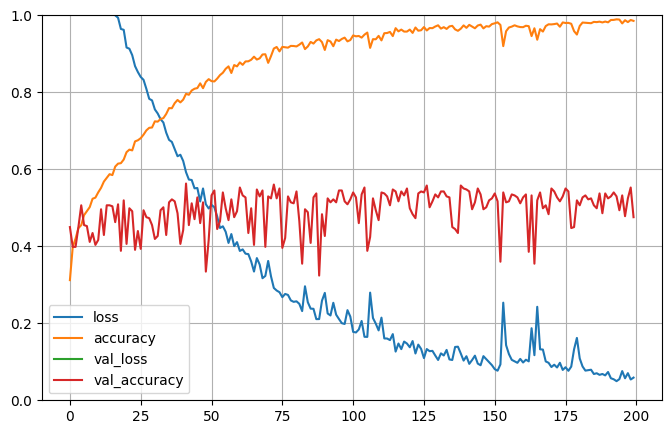

In [14]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting limits for y-axis
plt.show()

In [100]:
model.evaluate(X_test, y_test)

34/34 [==============================] - 0s 3ms/step - loss: 1.4958 - accuracy: 0.4704


[1.4958148002624512, 0.4703703820705414]